Import Libraries

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

Read Data

In [421]:
data1 = pd.read_csv("placement.csv")
data2 = pd.read_csv("housepricemulbasic.csv")
data3 = pd.read_csv("insurance.csv")
print(data1.head(3))
print(data2.head(3))
print(data3.head(3))

   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420       4.0          2        3        2
1  12250000  8960       4.0          4        4        3
2  12250000  9960       3.0          2        2        2
   age bought_insurance
0   22               No
1   25               No
2   47              Yes


NULL Handle

In [422]:
data2.isnull().sum()

price        0
area         0
bedrooms     4
bathrooms    0
stories      0
parking      0
dtype: int64

In [423]:
med=data2["bedrooms"].median()
data2["bedrooms"].fillna(med,inplace=True)
data2.isnull().sum()

C:\Users\Saad Ahmed\AppData\Local\Temp\ipykernel_12816\1043097306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2["bedrooms"].fillna(med,inplace=True)


price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [424]:
data3["bought_insurance"].replace({"No":0,"Yes":1},inplace=True)

C:\Users\Saad Ahmed\AppData\Local\Temp\ipykernel_12816\2897071054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data3["bought_insurance"].replace({"No":0,"Yes":1},inplace=True)
C:\Users\Saad Ahmed\AppData\Local\Temp\ipykernel_12816\2897071054.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

Feature and Target Variable Seperate

In [425]:
x1 = data1.drop("package", axis="columns")
y1 = data1["package"]
x2 = data2.drop("price", axis="columns")
y2 = data2["price"]
x3 = data3.drop("bought_insurance", axis="columns")
y3 = data3["bought_insurance"]

Linear Regression Single

In [426]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [427]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [428]:
print(model1.coef_)
print(model1.intercept_)

[0.57425647]
-1.0270069374542108


In [429]:
y_pred = model1.predict(x_test)

In [430]:
print(mean_squared_error(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.08417638361329656
0.2901316659954521
0.23150985393278373
0.7730984312051673


Linear Regression Multiple 

In [431]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [432]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [433]:
y_pred = model2.predict(x_test)

In [434]:
print(model2.coef_)
print(model2.intercept_)

[3.09038141e+02 1.31957249e+05 1.19490871e+06 5.00280157e+05
 3.39186882e+05]
86596.80752621405


In [435]:
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2295707159557.6724
1515159.1202107032
1129534.6757116874
0.5458155594511671


Logistic Regression Single 

In [436]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [437]:
model3=LogisticRegression()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)

Accuracy: 1.0
F1 Score: 1.0


<Axes: >

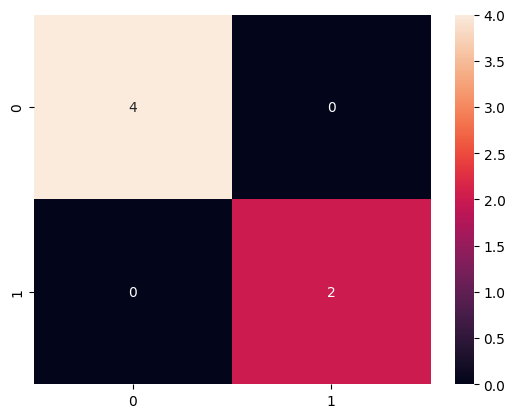

In [438]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)